In [ ]:
# Base Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import set_printoptions
from numpy import mean
# Models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
creditcard = pd.read_csv('/content/gdrive/MyDrive/ISAA/creditcard.csv', sep=',')
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Dividing the dataset into testing and validation sets (70/30 class distribution)
array = creditcard.values
X = array[:,0:30]
Y = array[:,30]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

#Feature Selection
Checking what all attributes affect fraud detection from the attributes present in the dataset.


In [ ]:
fi = ExtraTreesClassifier(n_estimators=10)
fi.fit(X, Y)
print(fi.feature_importances_)

[0.01528501 0.0096918  0.01022719 0.02505747 0.02960721 0.01147824
 0.012562   0.01983912 0.00868    0.0437609  0.07209169 0.0665474
 0.09097472 0.01043473 0.11654991 0.01483657 0.06171444 0.13196491
 0.10700396 0.01604101 0.01381428 0.01752582 0.01340016 0.0106937
 0.01276972 0.00857242 0.01908548 0.01283996 0.00790799 0.00904218]


#Models
Models used for ensembling are:

1. K-Nearest Neighbors
2. Random Forest Classifier
3. Lofistic Regression

In [ ]:
array = creditcard.values
X = array[:, [17,14,10,12,11]]
Y = array[:,30]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

In [ ]:
# KNN
knn = KNeighborsClassifier(algorithm='auto')
params_knn = {
    'n_neighbors': (1,30, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}

# Using Grid Search to generate value of n_neighbours according to the dataset
knn_gs = GridSearchCV(
    estimator=knn,
    param_grid=params_knn,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5)

knn_gs.fit(X_train, y_train)
y_pred = knn_gs.predict(X_test)

In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

In [ ]:
# Save the best model (with the best parameters)
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)
fpr, tpr, _ = roc_curve(y_test, y_pred)
# AUC
knn_auc = auc(fpr, tpr)
knn_mcc = matthews_corrcoef(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)
print(knn_auc)
print(knn_mcc)
print(knn_f1)

{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
0.8884255833886526
0.8288027504619272
0.8273381294964028


In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier()
params_rf = {"n_estimators": np.arange(1,30,1)}
rf_gs = GridSearchCV(rf, params_rf, cv=5)

rf_gs.fit(X_train, y_train)
y_pred = rf_gs.predict(X_test)

In [ ]:
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)
fpr, tpr, _ = roc_curve(y_test, y_pred)
rf_auc = auc(fpr, tpr)
rf_mcc = matthews_corrcoef(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
print(rf_auc)
print(rf_mcc)
print(rf_f1)

{'n_estimators': 25}
0.8850530670185984
0.8279908637946771
0.8260869565217391


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
lr_auc = auc(fpr, tpr)
lr_mcc = matthews_corrcoef(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)
print(lr_auc)
print(lr_mcc)
print(lr_f1)

0.7870683700289773
0.694809724926572
0.6827309236947791


#Ensembling
We stack the three models tuned above to create an ensemble to give the best results

In [ ]:
estimators=[("knn", knn_best), ("rf", rf_best), ("log_reg", log_reg)]

In [ ]:
# Use majority vote to predict class labels
ensemble_class = VotingClassifier(estimators, voting="hard")
# fit on training data
ensemble_class.fit(X_train, y_train)
y_pred = ensemble_class.predict(X_test)

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
ensemble_class_auc = auc(fpr, tpr)
ensemble_class_f1 = f1_score(y_test, y_pred)
ensemble_class_mcc = matthews_corrcoef(y_test, y_pred)
print(ensemble_class_auc)
print(ensemble_class_mcc)
print(ensemble_class_f1)

0.8782963102618417
0.8198826289054217
0.8175182481751826


#Metrics Comparison
We'll compare KNN, RFC, LR, and the Ensemble using the AUC calculated while training each model.

Here, the AUC is compared to see the difference in the performance of all the models in more detail.

In [ ]:
print("KNN AUC: {}".format(knn_auc))
print("RF AUC: {}".format(rf_auc))
print("Log_Reg AUC: {}".format(lr_auc))
print("Ensemble Voting AUC: {}".format(ensemble_class_auc))

KNN AUC: 0.8884255833886526
RF AUC: 0.8850530670185984
Log_Reg AUC: 0.7870683700289773
Ensemble Voting AUC: 0.8782963102618417


In [ ]:
knn_acc = knn_best.score(X_test, y_test)
rf_acc = rf_best.score(X_test, y_test)
lr_acc = log_reg.score(X_test, y_test)
ensemble_class_acc = ensemble_class.score(X_test, y_test)
print(knn_acc)
print(rf_acc)
print(lr_acc)
print(ensemble_class_acc)

It is visible from the above results that KNN gives higher AUC resulting in better performance as compared to LR. This observation is made wrt the dataset used and cannot guarantee the same performance for every dataset it encounters.

But in cases where KNN falls weak, RF and LR will be used in the Ensemble model, increasing its performance and making it useful for most cases.

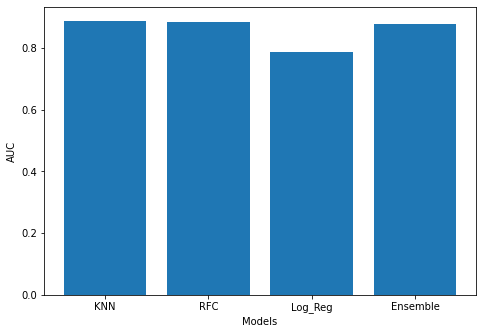

In [ ]:
# Plotting results for clearer understanding
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['KNN', 'RFC', 'Log_Reg', 'Ensemble']
values = [knn_auc, rf_auc, lr_auc, ensemble_class_auc]
ax.bar(models, values)
ax.set_xlabel("Models")
ax.set_ylabel("AUC")
plt.show()

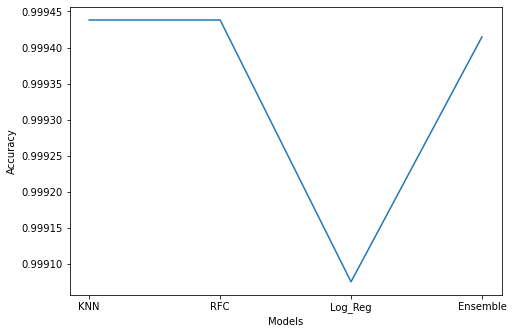

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['KNN', 'RFC', 'Log_Reg', 'Ensemble']
values = [knn_acc, rf_acc, lr_acc, ensemble_class_acc]
ax.plot(models, values)
ax.set_xlabel("Models")
ax.set_ylabel("Accuracy")
plt.show()

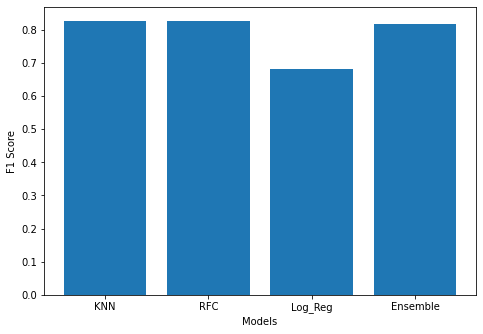

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['KNN', 'RFC', 'Log_Reg', 'Ensemble']
values = [knn_f1, rf_f1, lr_f1, ensemble_class_f1]
ax.bar(models, values)
ax.set_xlabel("Models")
ax.set_ylabel("F1 Score")
plt.show()

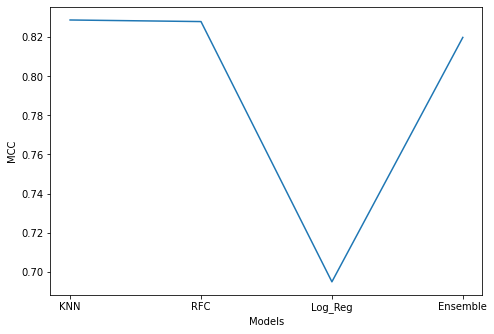

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['KNN', 'RFC', 'Log_Reg', 'Ensemble']
values = [knn_mcc, rf_mcc, lr_mcc, ensemble_class_mcc]
ax.plot(models, values)
ax.set_xlabel("Models")
ax.set_ylabel("MCC")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


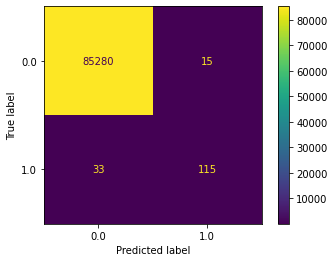

In [ ]:
# Confusion matrix shows that the classification is efficient with high accuracy
plot_confusion_matrix(knn_best, X_test, y_test)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


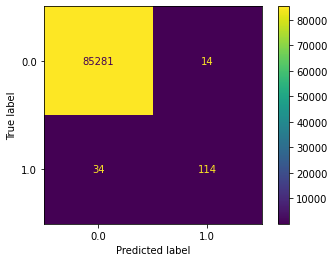

In [ ]:
plot_confusion_matrix(rf_best, X_test, y_test)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


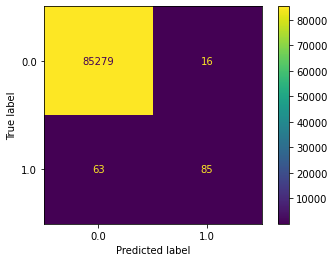

In [ ]:
plot_confusion_matrix(log_reg, X_test, y_test)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


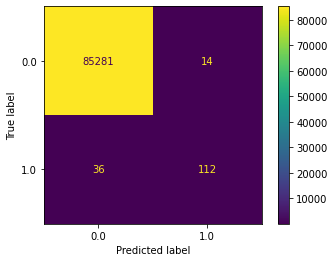

In [ ]:
plot_confusion_matrix(ensemble_class, X_test, y_test)
plt.show()